<a href="https://colab.research.google.com/github/jieun1102/dprproject/blob/main/dprproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일이 있는 디렉토리 설정
sea_dir = './dprproject/data/sea'
forest_dir = './dprproject/data/forest'

# 이미지 파일 불러오기 및 크기 조정
width = 128
height = 128

sea_images = []
for filename in os.listdir(sea_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(sea_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        sea_images.append(img)

forest_images = []
for filename in os.listdir(forest_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(forest_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        forest_images.append(img)

# 이미지 데이터 확인
plt.imshow(sea_images[3])
plt.show()
plt.imshow(forest_images[1])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './dprproject/data/sea'

In [ ]:
# 이미지 데이터를 numpy 배열로 변환
sea_data = np.array([np.array(img) for img in sea_images])
forest_data = np.array([np.array(img) for img in forest_images])

# 레이블 생성
sea_labels = np.zeros(len(sea_data))
forest_labels = np.ones(len(forest_data))

# 데이터 결합
X = np.concatenate((sea_data, forest_data), axis=0)
y = np.concatenate((sea_labels, forest_labels), axis=0)

# 데이터 형태 확인
print("X shape:", X.shape)
print("y shape:", y.shape)


NameError: name 'forest_images' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

NameError: name 'X' is not defined

In [ ]:
# 이미지 데이터 정규화
images = images / 255.0

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 이미지 파일이 있는 디렉토리 설정
sea_dir = 'jieun1102/dprproject/data/sea'
forest_dir = '.jieun1102/dprproject/data/forest'

# 이미지 파일 불러오기 및 크기 조정
width = 128
height = 128

sea_images = []
for filename in os.listdir(sea_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(sea_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        sea_images.append(img)

forest_images = []
for filename in os.listdir(forest_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(forest_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        forest_images.append(img)

# 이미지 데이터를 numpy 배열로 변환
sea_data = np.array([np.array(img) for img in sea_images])
forest_data = np.array([np.array(img) for img in forest_images])

# 레이블 생성
sea_labels = np.zeros(len(sea_data))
forest_labels = np.ones(len(forest_data))

# 데이터 결합
X = np.concatenate((sea_data, forest_data), axis=0)
y = np.concatenate((sea_labels, forest_labels), axis=0)

# 데이터 정규화
X = X / 255.0

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#모델 학습

#이미지 예측하는 코드 추가
# 이미지 파일 경로 설정
image_path = 'https://gscaltexmediahub.com/wp-content/uploads/2023/05/the-day-of-ocean-2023_1.png'  # 예시 이미지 파일 경로

# 이미지 불러오기 및 크기 조정
img = Image.open(image_path)
img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화

# 모델 예측
prediction = model.predict(np.expand_dims(img_array, axis=0))

# 결과 출력
#prediction[0][0]은 바다 클래스에 대한 예측 확률, 두번째 원소는 수플래스에 대한 예측확률
if prediction[0][0] > prediction[0][1]:
    print("해당 이미지는 바다입니다.")
else:
    print("해당 이미지는 숲입니다.")

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'jieun1102/dprproject/data/sea'

In [ ]:
# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git


Cloning into 'dprproject'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (436/436), done.
remote: Total 442 (delta 58), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (442/442), 161.17 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Updating files: 100% (296/296), done.


In [ ]:
data_dir = 'dprproject/data'
sea_dir = os.path.join(data_dir, 'sea')
forest_dir = os.path.join(data_dir, 'forest')


In [ ]:
import os
from PIL import Image

# 이미지 파일이 있는 디렉토리 설정
sea_dir = './dprproject/data/sea'
forest_dir = './dprproject/data/forest'

if not os.path.exists(sea_dir) or not os.path.exists(forest_dir):
    raise FileNotFoundError("One or both directories do not exist.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 불러오기 및 크기 조정
width, height = 128, 128

sea_images = []
for filename in os.listdir(sea_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(sea_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        sea_images.append(img)

forest_images = []
for filename in os.listdir(forest_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(forest_dir, filename))
        img = img.resize((width, height))  # 이미지 크기 조정
        forest_images.append(img)


In [ ]:
# 이미지 데이터를 numpy 배열로 변환
sea_data = np.array([np.array(img) for img in sea_images])
forest_data = np.array([np.array(img) for img in forest_images])

# 레이블 생성
sea_labels = np.zeros(len(sea_data))
forest_labels = np.ones(len(forest_data))

# 데이터 결합
X = np.concatenate((sea_data, forest_data), axis=0)
y = np.concatenate((sea_labels, forest_labels), axis=0)


In [ ]:
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


fatal: destination path 'dprproject' already exists and is not an empty directory.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



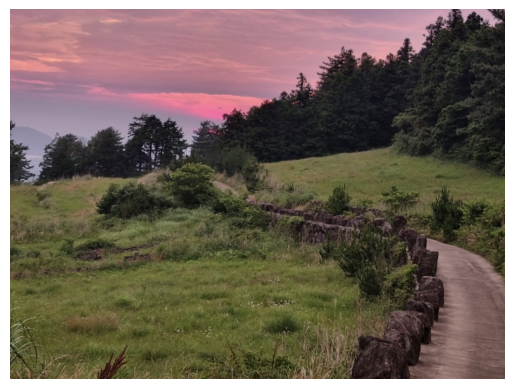

Epoch 1/10
6/6 [==============================] - 7s 902ms/step - loss: 1.4478 - accuracy: 0.6757 - val_loss: 0.2086 - val_accuracy: 0.9149
Epoch 2/10
6/6 [==============================] - 4s 696ms/step - loss: 0.1335 - accuracy: 0.9568 - val_loss: 0.0642 - val_accuracy: 0.9787
Epoch 3/10
6/6 [==============================] - 5s 910ms/step - loss: 0.0620 - accuracy: 0.9730 - val_loss: 0.1558 - val_accuracy: 0.9574
Epoch 4/10
6/6 [==============================] - 5s 748ms/step - loss: 0.1026 - accuracy: 0.9568 - val_loss: 0.0431 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 4s 729ms/step - loss: 0.0960 - accuracy: 0.9676 - val_loss: 0.1544 - val_accuracy: 0.9574
Epoch 6/10
6/6 [==============================] - 5s 903ms/step - loss: 0.0431 - accuracy: 0.9892 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 5s 690ms/step - loss: 0.0443 - accuracy: 0.9838 - val_loss: 0.0431 - val_accuracy: 0.9787
Epoch 8/10
6/6 [====

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 이미지와 레이블 불러오기
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

images, labels = load_data(data_dir)
labels = to_categorical(labels, num_classes=2)

# 이미지 데이터 정규화
images = images / 255.0

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# forest 폴더 안에 있는 이미지 중 하나를 화면에 출력
image_path = os.path.join(data_dir, 'forest')
filename = os.listdir(image_path)[0]
image_file = os.path.join(image_path, filename)
image = cv2.imread(image_file)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# test 폴더 안에 있는 이미지 중 하나를 화면에 출력
test_image_path = test_dir  # test 이미지 폴더 경로

# 테스트 이미지 폴더 안에 있는 모든 이미지 파일 출력
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_file = os.path.join(test_dir, filename)  # 이미지 파일 경로 생성
        image = cv2.imread(image_file)  # 이미지 파일 읽기
        if image is not None:  # 이미지가 제대로 읽혔는지 확인
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 이미지 출력
            plt.axis('off')  # 축 제거
            plt.show()



# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 테스트 이미지 불러오기 및 전처리
test_images = []
test_image_paths = []  # 테스트 이미지 파일 경로를 저장할 리스트
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
        img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화
        test_images.append(img_array)
        test_image_paths.append(os.path.join(test_dir, filename))  # 파일 경로 저장

# 테스트 이미지 파일 목록 출력
print("테스트 이미지 파일 목록:")
for path in test_image_paths:
    print(path)

# 예측 수행 및 결과 출력
for i, img_array in enumerate(test_images):
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    prediction = model.predict(img_array)
    if prediction[0][0] > prediction[0][1]:
        print(f"이미지 {i+1}: 해당 이미지는 바다입니다.")
    else:
        print(f"이미지 {i+1}: 해당 이미지는 숲입니다.")
